In [5]:
import io
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dropout, MaxPooling2D, Conv2D, Dense
from keras.datasets import cifar10
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import os
from PIL import Image
import tensorflow as tf
from google.colab import files
import numpy as np
%matplotlib inline

In [6]:
from io import BytesIO

In [2]:
color = files.upload()

Saving 1828_1942-10-11_2013.jpg to 1828_1942-10-11_2013.jpg
Saving 1975_1939-04-12_2010.jpg to 1975_1939-04-12_2010.jpg
Saving 3382_1981-12-02_2013.jpg to 3382_1981-12-02_2013.jpg
Saving 3740_1945-04-25_2013.jpg to 3740_1945-04-25_2013.jpg
Saving 4216_1940-09-11_2007.jpg to 4216_1940-09-11_2007.jpg
Saving 4649_1948-03-14_2012.jpg to 4649_1948-03-14_2012.jpg
Saving 5397_1962-06-15_2010.jpg to 5397_1962-06-15_2010.jpg
Saving 7893_1951-04-29_1990.jpg to 7893_1951-04-29_1990.jpg
Saving 8081_1925-01-30_2008.jpg to 8081_1925-01-30_2008.jpg
Saving 8397_1953-05-29_2010.jpg to 8397_1953-05-29_2010.jpg
Saving 8432_1947-07-03_2011.jpg to 8432_1947-07-03_2011.jpg
Saving 11530_1976-07-09_1989.jpg to 11530_1976-07-09_1989.jpg
Saving 12230_1968-02-08_2007.jpg to 12230_1968-02-08_2007.jpg
Saving 12501_1941-12-08_2008.jpg to 12501_1941-12-08_2008.jpg
Saving 13448_1948-12-30_2008.jpg to 13448_1948-12-30_2008.jpg
Saving 13717_1966-08-14_2013.jpg to 13717_1966-08-14_2013.jpg
Saving 16003_1923-01-08_2005.j

In [3]:
color_images = color
file_name = [f for f in color_images.keys()]

In [7]:
colorphotos = list()
for name in file_name:
# load image
    color_data = np.array(Image.open(BytesIO(color_images[name])))
# store loaded image
    colorphotos.append(color_data)

In [8]:
blackNwhite = list()

for item in colorphotos:
  pic = item
  pic = Image.fromarray(pic)
  pic = pic.convert('L')
  pic = np.array(pic)
  blackNwhite.append(pic)

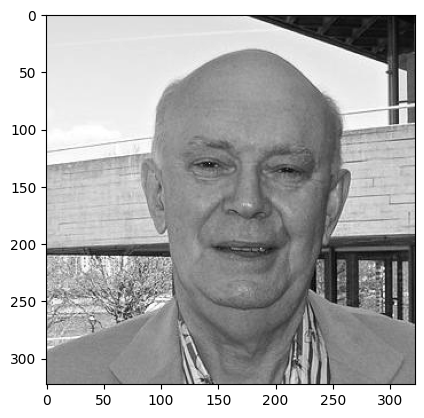

In [9]:
plt.imshow(blackNwhite[1], cmap='gray')

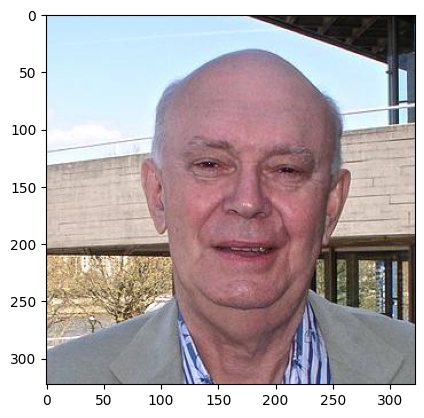

In [10]:
plt.imshow(colorphotos[1])

In [11]:
bw_S = np.array(blackNwhite)/255
color_S = np.array(colorphotos, dtype=object) / 255.0

<ipython-input-11-19241724152d>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bw_S = np.array(blackNwhite)/255


In [12]:
bw_S.shape

(590,)

In [13]:
color_S.shape

(590,)

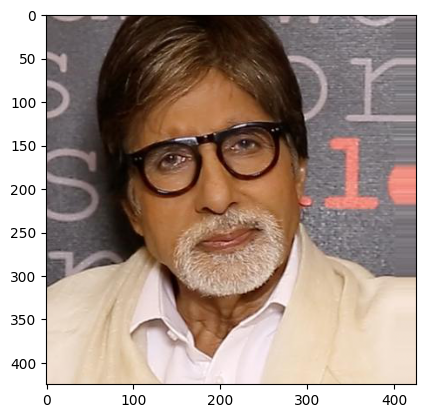

In [14]:
plt.imshow(color_S[0])

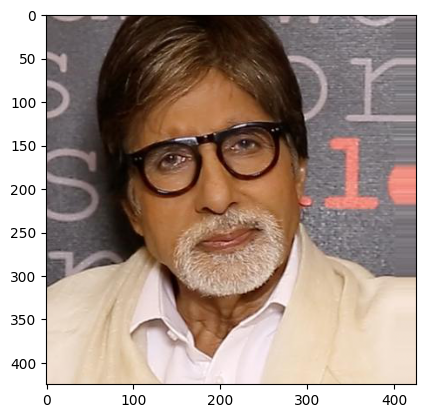

In [15]:
plt.imshow(color_S[0])

In [16]:
import numpy as np
from PIL import Image

def resize_images(images_array):
    resized_images = []
    for img in images_array:
        # Convert the NumPy array to PIL Image
        pil_img = Image.fromarray(img)

        # Resize the image to 200x200
        resized_img = pil_img.resize((200, 200))

        # Convert the resized image back to NumPy array
        resized_array = np.array(resized_img)

        # Append the resized image to the list
        resized_images.append(resized_array)

    # Convert the list of resized images back to a NumPy array
    resized_images_array = np.array(resized_images)
    return resized_images_array

In [17]:
bw_S=resize_images(bw_S)

In [18]:
bw_S.shape

(590, 200, 200)

In [19]:
bw_S=bw_S.reshape(590,200,200,1)

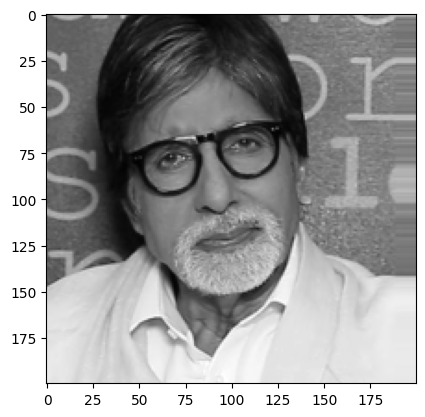

In [20]:
plt.imshow(bw_S[0],cmap='gray')

In [21]:
def resize_images(images_array):
    resized_images = []
    for img in images_array:
        # Scale the pixel values to [0, 1]

        # Convert the NumPy array to PIL Image
        pil_img = Image.fromarray((img * 255).astype(np.uint8))

        # Resize the image to 200x200
        resized_img = pil_img.resize((200, 200))

        # Convert the resized image back to NumPy array
        resized_array = np.array(resized_img)

        # Append the resized image to the list
        resized_images.append(resized_array)

    # Convert the list of resized images back to a NumPy array
    resized_images_array = np.array(resized_images)
    return resized_images_array

In [22]:
color_S=resize_images(color_S)

In [23]:
color_S.shape

(590, 200, 200, 3)

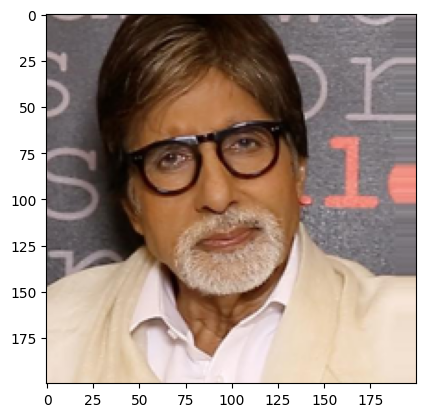

In [24]:
plt.imshow(color_S[0])

In [25]:
X_train = bw_S[:-150]
X_test = bw_S[-150:]

y_train = color_S[0:-150]
y_test = color_S[-150:]

In [26]:
from tensorflow.keras import datasets, layers, models

In [27]:
#model Initial
model = models.Sequential()
model.add(layers.Conv2D(8, kernel_size = (3,3),activation='relu', padding='same', input_shape = (200,200,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(layers.Conv2D(16, kernel_size = (3,3), strides=(1, 1),activation='relu' , padding='same'))
model.add(layers.Conv2D(34, kernel_size = (3,3), strides=(1, 1),activation='relu' ,padding='same'))
model.add(layers.Conv2D(34, kernel_size = (3,3), strides=(1, 1),activation='relu' ,padding='same'))
model.add(layers.Conv2D(64, kernel_size = (5,5), strides=(1, 1),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(layers.Conv2D(128, kernel_size = (3,3), strides=(1, 1),activation='relu' , padding='same'))
model.add(layers.Conv2D(128, kernel_size = (3,3), strides=(1, 1),activation='relu' ,padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(layers.Conv2D(64, kernel_size = (3,3), strides=(1, 1),activation='relu' ,padding='same'))
model.add(layers.Conv2D(34, kernel_size = (5,5), strides=(1, 1),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(layers.Conv2D(16, kernel_size = (3,3), strides=(1, 1),activation='relu' ,padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(layers.Conv2D(3, kernel_size = (3,3), strides=(1, 1),activation='relu' ,padding='same'))
model.add(Dense(64,input_shape=(3,), activation='relu'))
model.add(Dense(3,input_shape=(3,), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 8)       80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 200, 200, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 16)      1168      
                                                                 
 conv2d_2 (Conv2D)           (None, 200, 200, 34)      4930      
                                                                 
 conv2d_3 (Conv2D)           (None, 200, 200, 34)      10438     
                                                                 
 conv2d_4 (Conv2D)           (None, 200, 200, 64)      54464     
                                                        

In [28]:
from keras.utils.vis_utils import plot_model

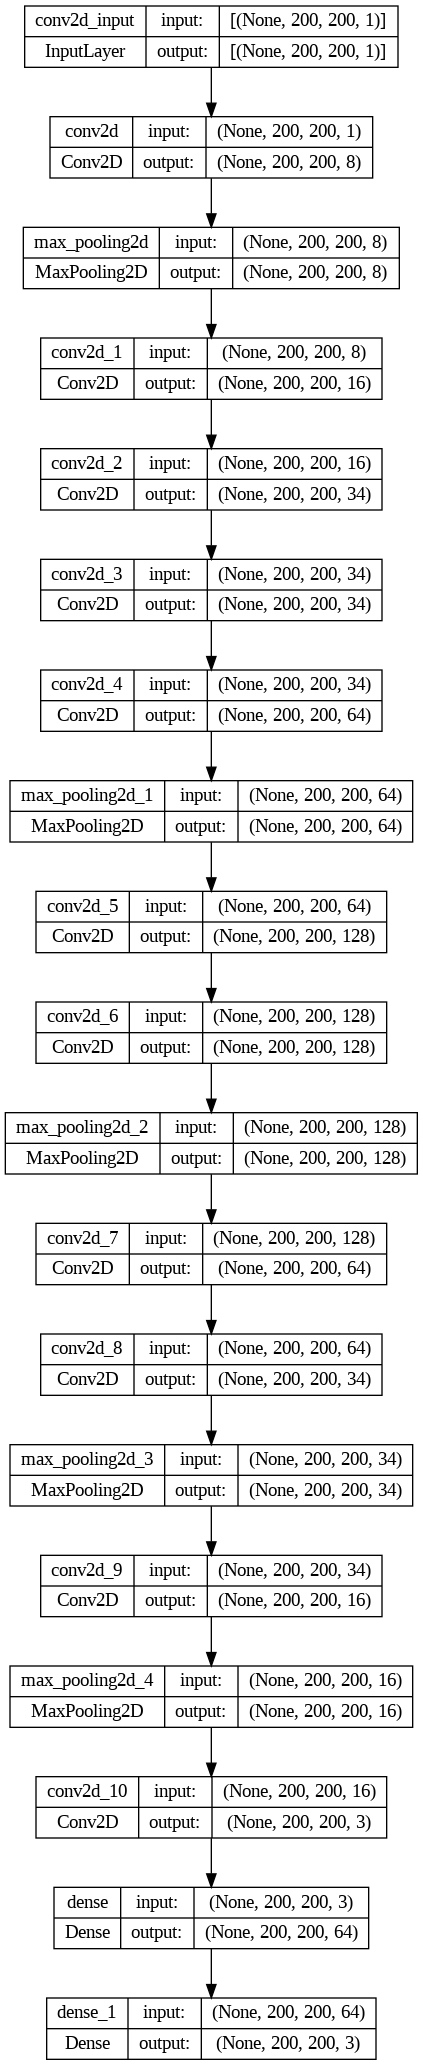

In [29]:
plot_model(model, to_file = 'model_diagram.png',show_shapes = True, show_layer_names = True)

In [30]:
#model test
model = Sequential()
model.add(Conv2D(8, kernel_size = (3,3),activation='relu', padding='same', input_shape = (200,200,1)))
model.add(Conv2D(16, kernel_size = (3,3), strides=(1, 1),activation='relu' , padding='same'))
model.add(Conv2D(34, kernel_size = (3,3), strides=(1, 1),activation='relu' ,padding='same'))
model.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1),activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size = (3,3), strides=(1, 1),activation='relu' , padding='same'))
model.add(Conv2D(128, kernel_size = (3,3), strides=(1, 1),activation='relu' ,padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,input_shape=(3,), activation='relu'))
model.add(Dense(3,input_shape=(3,), activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 200, 200, 8)       80        
                                                                 
 conv2d_12 (Conv2D)          (None, 200, 200, 16)      1168      
                                                                 
 conv2d_13 (Conv2D)          (None, 200, 200, 34)      4930      
                                                                 
 conv2d_14 (Conv2D)          (None, 200, 200, 64)      54464     
                                                                 
 conv2d_15 (Conv2D)          (None, 200, 200, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 200, 200, 128)     147584    
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 128)   

Epoch 1/100
12/12 [==============================] - 41s 1s/step - loss: 15974.3877 - accuracy: 0.7057 - mse: 15974.3867 - val_loss: 14824.3779 - val_accuracy: 0.6993 - val_mse: 14824.3779
Epoch 2/100
12/12 [==============================] - 6s 483ms/step - loss: 14435.5723 - accuracy: 0.5040 - mse: 14435.5723 - val_loss: 14531.1709 - val_accuracy: 0.4916 - val_mse: 14531.1709
Epoch 3/100
12/12 [==============================] - 6s 484ms/step - loss: 13172.6074 - accuracy: 0.4703 - mse: 13172.6064 - val_loss: 13070.4219 - val_accuracy: 0.4611 - val_mse: 13070.4199
Epoch 4/100
12/12 [==============================] - 6s 487ms/step - loss: 11629.8291 - accuracy: 0.4743 - mse: 11629.8291 - val_loss: 12469.7539 - val_accuracy: 0.4644 - val_mse: 12469.7539
Epoch 5/100
12/12 [==============================] - 6s 489ms/step - loss: 9904.0430 - accuracy: 0.4646 - mse: 9904.0439 - val_loss: 11079.7100 - val_accuracy: 0.4414 - val_mse: 11079.7100
Epoch 6/100
12/12 [==============================

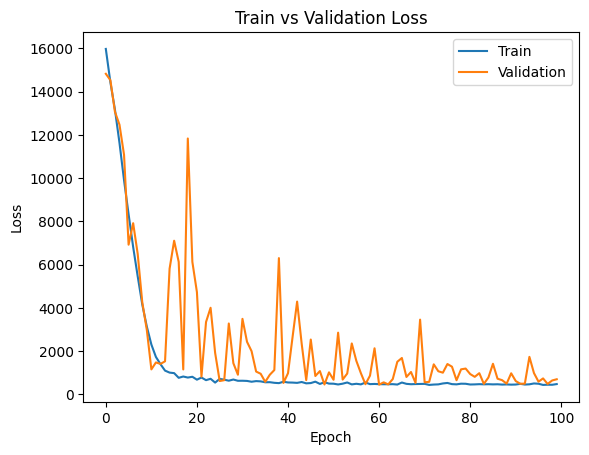

In [31]:
model.compile(loss='mse', optimizer='rmsprop', metrics = ['accuracy', 'mse'])
history = model.fit(X_train, y_train, epochs=100, validation_split=0.15)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [32]:
predictions = model.predict(X_test)

5/5 [==============================] - 1s 148ms/step


In [33]:
predictions.shape

(150, 200, 200, 3)

In [34]:
predictions[0]

array([[[ 26.664331 ,  16.836527 ,  16.046047 ],
        [ 20.277643 ,  13.595821 ,  13.1917925],
        [ 20.33909  ,  13.728465 ,  13.43333  ],
        ...,
        [ 20.344263 ,  13.653698 ,  13.362321 ],
        [ 21.481365 ,  14.331482 ,  13.862945 ],
        [ 28.982683 ,  17.299536 ,  15.614099 ]],

       [[ 20.352554 ,  13.651004 ,  13.278347 ],
        [ 11.479949 ,   7.6328983,   8.156451 ],
        [ 11.7703905,   7.9846253,   8.721504 ],
        ...,
        [ 11.35615  ,   7.553254 ,   8.3396635],
        [ 13.1805525,   8.646438 ,   9.116257 ],
        [ 21.398956 ,  14.208859 ,  13.826751 ]],

       [[ 17.930246 ,  12.019834 ,  11.923028 ],
        [  8.281002 ,   5.542289 ,   6.4812803],
        [  9.656562 ,   6.736456 ,   7.8882775],
        ...,
        [  8.166475 ,   5.482907 ,   6.7959394],
        [ 10.149551 ,   6.6590567,   7.5529737],
        [ 19.747044 ,  13.136384 ,  12.992013 ]],

       ...,

       [[ 60.67576  ,  46.71949  ,  44.219044 ],
        [ 6

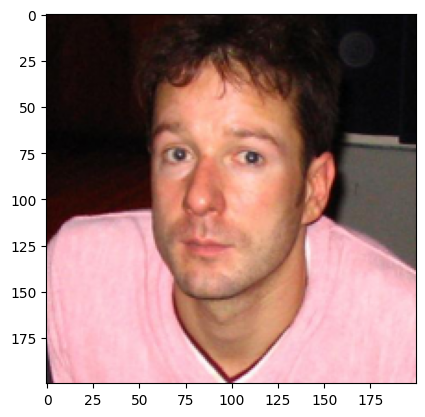

In [35]:
plt.imshow(y_test[0]/255)

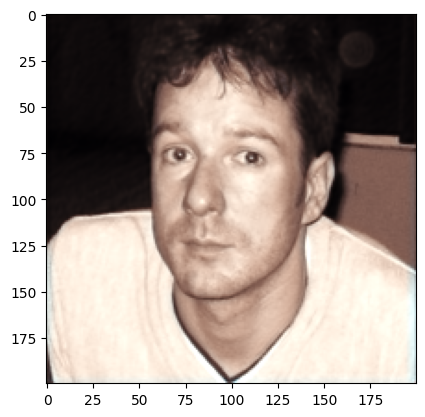

In [36]:
plt.imshow(predictions[0]/255)